In [1]:
#!pip install tensorflow

     -------------------------------------- 284.1/284.1 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 413.2/413.2 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 24

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.1 which is incompatible.


In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix

In [2]:
print(tf.__version__)

2.14.0


#  exercise of nueral network

In [59]:
x = np.load("X.npy")
y=np.load("Y.npy")

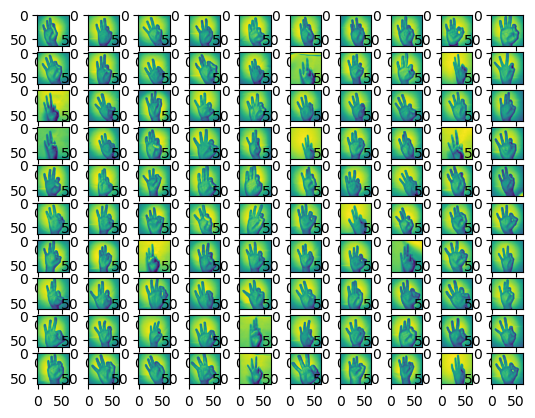

In [4]:
fig,ax = plt.subplots(10,10)
k=0
for i in range(10):
    for y in range(10):
        ax[i][y].imshow(x[k])
        k+=1
plt.show()

# Train-Test Split Data

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [10]:
# Create a Sequential model
from keras.optimizers import Adam
model = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),
    layers.Dense(300, activation="relu", kernel_regularizer='l2'),  # Adding L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(500, activation="relu", kernel_regularizer='l2'),  # Adding L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.fit(x=X_train,y=Y_train,epochs=30,validation_data=[X_test,Y_test])

Epoch 1/30
55/55 [==============================] - 3s 24ms/step - loss: 7.5057 - accuracy: 0.5434 - val_loss: 7.9853 - val_accuracy: 0.1968
Epoch 2/30
55/55 [==============================] - 1s 19ms/step - loss: 3.7378 - accuracy: 0.6998 - val_loss: 6.8211 - val_accuracy: 0.1806
Epoch 3/30
55/55 [==============================] - 1s 19ms/step - loss: 2.4043 - accuracy: 0.7255 - val_loss: 4.0711 - val_accuracy: 0.2419
Epoch 4/30
55/55 [==============================] - 1s 19ms/step - loss: 1.7688 - accuracy: 0.7454 - val_loss: 5.6532 - val_accuracy: 0.0935
Epoch 5/30
55/55 [==============================] - 1s 19ms/step - loss: 1.4320 - accuracy: 0.7637 - val_loss: 4.6184 - val_accuracy: 0.2774
Epoch 6/30
55/55 [==============================] - 1s 19ms/step - loss: 1.2828 - accuracy: 0.7534 - val_loss: 6.3090 - val_accuracy: 0.1774
Epoch 7/30
55/55 [==============================] - 1s 19ms/step - loss: 1.1949 - accuracy: 0.7460 - val_loss: 9.3710 - val_accuracy: 0.2387
Epoch 8/30
55

In [12]:
# Evaluate the model on the test set:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

10/10 [==============================] - 0s 4ms/step - loss: 44.8609 - accuracy: 0.1032
Test Loss: 44.86088562011719, Test Accuracy: 0.10322580486536026


# CNN

In [2]:
x = np.load("X.npy")
y=np.load("Y.npy")

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [3]:
X_train.shape

(1752, 64, 64)

In [4]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [5]:
# Reshape your images to add the channels dimension
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)
#Y_train = Y_train.reshape(-1)  # Flatten to a 1D array
#Y_test = Y_test.reshape(-1)    # Flatten to a 1D array

In [32]:
num_filters = 16
model = models.Sequential([
    layers.Conv2D(num_filters, (3, 3), activation='relu', input_shape=(64, 64,1),padding = 'Same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(num_filters , (3, 3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(num_filters , (3, 3), activation='relu'),
    layers.Conv2D(filters=16,activation="relu",kernel_size=(3,3), input_shape=(64, 64,1),padding = 'Same'),
    layers.MaxPool2D((2,2)),
    
    # Fully connected layers
    layers.Flatten(input_shape=(64, 64,1)),
    layers.Dense(num_filters * 4, activation='relu'),
     layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(num_filters * 4, activation='relu'),
    
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x=X_train,y=Y_train,epochs=10,validation_data=[X_test,Y_test])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
55/55 [==============================] - 5s 56ms/step - loss: 1.8485 - accuracy: 0.3756 - val_loss: 2.1808 - val_accuracy: 0.1839
Epoch 2/10
55/55 [==============================] - 3s 49ms/step - loss: 1.0456 - accuracy: 0.6752 - val_loss: 1.8235 - val_accuracy: 0.4871
Epoch 3/10
55/55 [==============================] - 3s 48ms/step - loss: 0.7264 - accuracy: 0.7865 - val_loss: 1.3186 - val_accuracy: 0.6065
Epoch 4/10
55/55 [==============================] - 2s 45ms/step - loss: 0.5526 - accuracy: 0.8242 - val_loss: 1.4568 - val_accuracy: 0.3839
Epoch 5/10
55/55 [==============================] - 2s 43ms/step - loss: 0.4306 - accuracy: 0.8710 - val_loss: 1.3414 - val_accuracy: 0.5000
Epoch 6/10
55/55 [==============================] - 2s 43ms/step - loss: 0.3478 - accuracy: 0.8921 - val_loss: 0.7648 - val_accuracy: 0.7194
Epoch 7/10
55/55 [==============================] - 2s 44ms/step - loss: 0.3144 - accuracy: 0.8990 - val_loss: 0.8157 - val_accuracy: 0.6710
Epoch 8/10
55

# confusion matrix

10/10 [==============================] - 0s 9ms/step


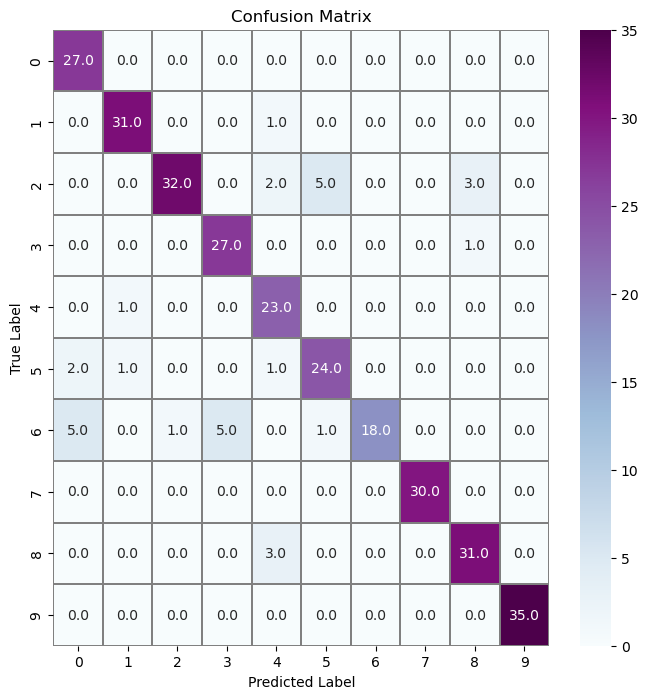

In [31]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()